# MNIST Digit Classification

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

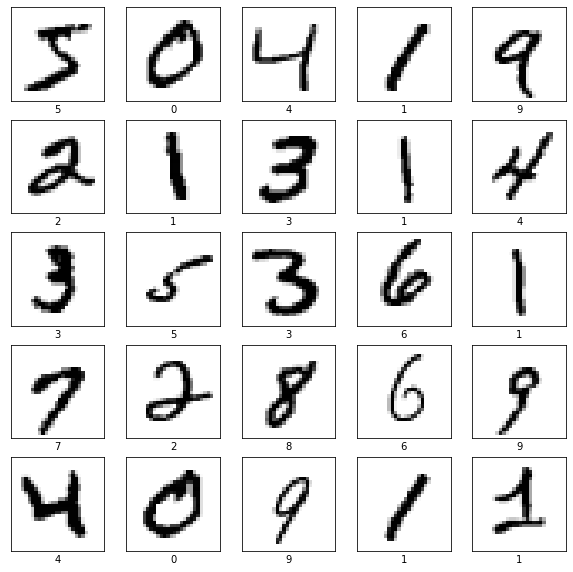

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
X_train= X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train= X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1) ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=14,validation_data=(X_test, y_test))

Epoch 1/14


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 58s 31ms/step - loss: 0.1380 - accuracy: 0.9581 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 2/14
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0463 - accuracy: 0.9855 - val_loss: 0.0344 - val_accuracy: 0.9876
Epoch 3/14
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 4/14
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0285 - val_accuracy: 0.9904
Epoch 5/14
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 6/14
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0299 - val_accuracy: 0.9915
Epoch 7/14
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0352 - val_accura

In [ ]:
test_loss ,test_acc=model.evaluate(X_test,y_test,verbose=1)

print("TEST ACCURACY:",test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 1.4700 - accuracy: 0.9913
TEST ACCURACY: 0.9912999868392944


In [ ]:
model.save('Classify_im.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Classify_im.model/assets


In [ ]:
model1= tf.keras.models.load_model('Classify_im.model')

In [ ]:
model1= tf.keras.models.load_model('Classify_im.model')

In [ ]:
from keras.preprocessing import image
img=image.load_img(r'7ocr.png',target_size=(28,28,1),color_mode='grayscale')

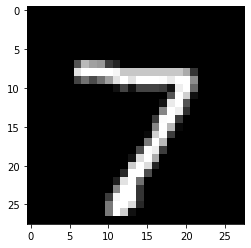

In [ ]:
plt.imshow(img,cmap="gray")

In [ ]:
import numpy as np
img=image.img_to_array(img) 
img/=255    
img=np.array([img]) 

In [ ]:
np.argmax(model.predict(img), axis=-1)

array([7])

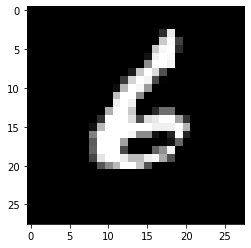

In [ ]:
img1=image.load_img(r'6ocr.png',target_size=(28,28,1),color_mode='grayscale')
plt.imshow(img1,cmap="gray")

In [ ]:
import numpy as np
img1=image.img_to_array(img1) 
img1/=255    
img1=np.array([img1])


In [ ]:
np.argmax(model.predict(img1), axis=-1)

array([6])